<div class="alert alert-block alert-success">
    
# FIT5196 Task 3 in Assessment 1
    
#### Student Name: Yehezkiel Efraim Darmadi, Yogi Sarumaha
#### Student ID: 34078215, 34087672

Date: 22 August 2024

Environment: Python3

Libraries Used:
- **re:** Used for defining and using regular expressions, included in Python standard library.
- **pandas:** Provides data structures and data analysis tools. Essential for data manipulation and analysis.
- **numpy:** Adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- **matplotlib.pyplot:** Allows creation of static, interactive, and animated visualizations in Python.
- **seaborn:** Data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **json:** Handles JSON data. Allows parsing JSON from strings or files and converting Python objects to JSON.
- **google.colab.drive:** Facilitates mounting Google Drive in Google Colab notebooks, providing access to files in Google Drive.
- **wordcloud:** A tool for creating word cloud images from text, highlighting the most significant words visually.
- **plotly.express:** Facilitates the creation of interactive plots and offers a simple syntax for complex charts.
    
</div>

<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Raw Data(given input file from task1)](#examine1) <br>
[4. Examining metadata](#examiningmetadata) <br>
[5. Data Analysis](#DA) <br>
    - [Insight 1: Number of business by unique payment type](#insight1) <br>
    - [Insight 2: Categorizing Customer Experiences](#insight2) <br>
    - [Insight 3a: Unique of payment type](#insight3a) <br>
    - [Insight 3b: Most popular combination payment type](#insight3b) <br>
    - [Insight 4a: Top 5 Most Frequent Categories](#insight4a) <br>
    - [Insight 4b: Customer Sentiments Across Key Business Categories](#insight4b) <br>
    - [Insight 5: Comparative Insights on Popular Business Categories and Their Key Terms](#insight5) <br>
[6. Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.  Introduction  <a class="anchor" name="Intro"></a>
    
</div>

---

**Understanding the Sample Data**

The auxiliary metadata dataset provided includes various attributes such as `name`, `address`, `gmap_id`, `description`, `latitude`, `longitude`, `category`, `avg_rating`, `num_of_reviews`, `price`, `hours`, `MISC`, `state`, `relative_results`, and `url`. This dataset represents a collection of business information that is key to understanding the geographical spread, service type, and customer perception of these businesses. Initial review of this data will guide the setup of our analysis framework by identifying key data points that relate directly to customer experiences and business performance.

**Evaluating and Incorporating the Metadata**

The metadata is crucial for analyzing sentiment across different business categories and for gauging overall business performance based on customer ratings and reviews. Incorporating metadata allows for a more nuanced analysis of the words and phrases most commonly associated with positive and negative sentiments within various business contexts. This approach will enable the creation of visualizations such as word clouds and the identification of popular words in categories, thus providing deeper insights into customer feedback and business attributes. The integration of this metadata into our main dataset is fundamental to enriching our analysis, offering a comprehensive view of how businesses are perceived across different locations and categories.

---


<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

---




In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from google.colab import drive

from wordcloud import WordCloud
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
task_2_output_dir = "/content/drive/MyDrive/Data Wrangling/assignment 1/Task 2"
metadata_dir = "/content/drive/MyDrive/Data Wrangling/assignment 1/Task 3"

<div class="alert alert-block alert-warning">

## 3.  Examining Raw Data(given input file from task1) <a class="anchor" name="examine1"></a>

 </div>

In [ ]:
# Path to the vocabulary file
vocab_path = '/content/drive/MyDrive/Data Wrangling/assignment 1/Task 2/111_vocab.txt'

# Read the vocabulary file into a dictionary
vocab_index_to_word = {}
with open(vocab_path, 'r') as file:
    for line in file:
        word, index = line.strip().split(': ')
        vocab_index_to_word[int(index)] = word

# Path to the count vector file
countvec_path = '/content/drive/MyDrive/Data Wrangling/assignment 1/Task 2/111_countvec.txt'

# Prepare a list to hold the data
countvec_data = []

# Read and parse the count vector file
with open(countvec_path, 'r') as file:
    for line in file:
        parts = line.strip().split(',')
        gmap_id = parts[0]
        for count_pair in parts[1:]:  # Skip the first element as it's the gmap_id
            index, count = count_pair.split(':')
            word = vocab_index_to_word.get(int(index))  # Get the word from vocab_dict
            if word:  # Check if the word exists
                countvec_data.append([gmap_id, word, int(count)])

# Convert the list to a DataFrame
df_gmap_word_counts = pd.DataFrame(countvec_data, columns=['gmap_id', 'word', 'word_count'])

# Display the first few rows of the DataFrame
print(df_gmap_word_counts.head())


                                 gmap_id        word  word_count
0  0x14e4bcd95f3c0451:0x7ccf04478a4d59af        abil           1
1  0x14e4bcd95f3c0451:0x7ccf04478a4d59af      access           2
2  0x14e4bcd95f3c0451:0x7ccf04478a4d59af    accommod           3
3  0x14e4bcd95f3c0451:0x7ccf04478a4d59af  acknowledg           1
4  0x14e4bcd95f3c0451:0x7ccf04478a4d59af      action           1


<div class="alert alert-block alert-warning">

## 4.  Examining Metadata <a class="anchor" name="examiningmetadata"></a>

 </div>

In [ ]:
meta_df = pd.read_json(metadata_dir + "/meta-California.json", lines = True)
meta_df.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
1,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Matrix International Textiles,"Matrix International Textiles, 1363 S Bonnie B...",0x80c2cf163db6bc89:0x219484e2edbcfa41,None,34.015505,-118.181839,[Fabric store],3.5,6,None,"[[Thursday, 8:30AM–5:30PM], [Friday, 8:30AM–5:...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 5:30PM,"[0x80c2cf042a5d9561:0xd0024ad6f81f1335, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [ ]:
# Organize relevant data into separate DataFrames for ease of analysis
category_df = meta_df[['gmap_id', 'category']]
working_hours_df = meta_df[['gmap_id', 'hours']]
misc_df = meta_df[['gmap_id', 'MISC']]
relative_df = meta_df[['gmap_id', 'relative_results']]

# Create a DataFrame with business descriptions, excluding non-descriptive attributes
business_desc_df = meta_df.drop(columns=['category', 'hours', 'MISC', 'relative_results'])

In [ ]:
# Exploding categories and resetting index for clean DataFrame manipulation
category_exp_df = category_df.explode("category").reset_index(drop=True)
working_hours_exp_df = working_hours_df.explode("hours").reset_index(drop=True)
relative_exp_df = relative_df.explode("relative_results").reset_index(drop=True)

# Normalizing JSON data and merging with gmap_id for consistent DataFrame structure
misc_exp_df = pd.json_normalize(misc_df['MISC'])
misc_exp_df = pd.concat([misc_df[['gmap_id']], misc_exp_df], axis=1)

# Exploding various categories from the normalized miscellaneous data
service_options_df = misc_exp_df[["gmap_id", "Service options"]].explode("Service options").reset_index(drop=True)
accessibility_df = misc_exp_df[["gmap_id", "Accessibility"]].explode("Accessibility").reset_index(drop=True)
offerings_df = misc_exp_df[["gmap_id", "Offerings"]].explode("Offerings").reset_index(drop=True)
amenities_df = misc_exp_df[["gmap_id", "Amenities"]].explode("Amenities").reset_index(drop=True)
payments_df = misc_exp_df[["gmap_id", "Payments"]].explode("Payments").reset_index(drop=True)

# Handling health and safety data with potential alternate naming
health_safety_df = misc_exp_df[["gmap_id", "Health & safety"]].explode("Health & safety").reset_index(drop=True)
health_safety_2_df = misc_exp_df[["gmap_id", "Health and safety"]].explode("Health and safety").reset_index(drop=True)
health_safety_df = health_safety_df.fillna(health_safety_2_df)

# Further exploding miscellaneous categories for detailed analysis
popular_for_df = misc_exp_df[["gmap_id", "Popular for"]].explode("Popular for").reset_index(drop=True)
dining_options_df = misc_exp_df[["gmap_id", "Dining options"]].explode("Dining options").reset_index(drop=True)
crowds_df = misc_exp_df[["gmap_id", "Crowd"]].explode("Crowd").reset_index(drop=True)
planning_df = misc_exp_df[["gmap_id", "Planning"]].explode("Planning").reset_index(drop=True)
from_the_business_df = misc_exp_df[["gmap_id", "From the business"]].explode("From the business").reset_index(drop=True)
recycling_df = misc_exp_df[["gmap_id", "Recycling"]].explode("Recycling").reset_index(drop=True)
highlights_df = misc_exp_df[["gmap_id", "Highlights"]].explode("Highlights").reset_index(drop=True)
getting_here_df = misc_exp_df[["gmap_id", "Getting here"]].explode("Getting here").reset_index(drop=True)
activities_df = misc_exp_df[["gmap_id", "Activities"]].explode("Activities").reset_index(drop=True)
lodging_options_df = misc_exp_df[["gmap_id", "Lodging options"]].explode("Lodging options").reset_index(drop=True)


In [ ]:
# Clean up category expanded dataframe
category_exp_df = category_exp_df.dropna().reset_index(drop=True)

# Clean up working hours expanded dataframe
working_hours_exp_df = working_hours_exp_df.dropna().reset_index(drop=True)

# Clean up relative results expanded dataframe
relative_exp_df = relative_exp_df.dropna().reset_index(drop=True)

# Clean up service options expanded dataframe
service_options_df = service_options_df.dropna().reset_index(drop=True)

# Clean up accessibility options expanded dataframe
accessibility_df = accessibility_df.dropna().reset_index(drop=True)

# Clean up offerings expanded dataframe
offerings_df = offerings_df.dropna().reset_index(drop=True)

# Clean up amenities expanded dataframe
amenities_df = amenities_df.dropna().reset_index(drop=True)

# Clean up payments options expanded dataframe
payments_df = payments_df.dropna().reset_index(drop=True)

# Clean up health and safety expanded dataframe
health_safety_df = health_safety_df.dropna().reset_index(drop=True)

# Clean up popular for expanded dataframe
popular_for_df = popular_for_df.dropna().reset_index(drop=True)

# Clean up dining options expanded dataframe
dining_options_df = dining_options_df.dropna().reset_index(drop=True)

# Clean up crowd options expanded dataframe
crowds_df = crowds_df.dropna().reset_index(drop=True)

# Clean up planning options expanded dataframe
planning_df = planning_df.dropna().reset_index(drop=True)

# Clean up from the business expanded dataframe
from_the_business_df = from_the_business_df.dropna().reset_index(drop=True)

# Clean up recycling options expanded dataframe
recycling_df = recycling_df.dropna().reset_index(drop=True)

# Clean up highlights options expanded dataframe
highlights_df = highlights_df.dropna().reset_index(drop=True)

# Clean up getting here options expanded dataframe
getting_here_df = getting_here_df.dropna().reset_index(drop=True)

# Clean up activities options expanded dataframe
activities_df = activities_df.dropna().reset_index(drop=True)

# Clean up lodging options expanded dataframe
lodging_options_df = lodging_options_df.dropna().reset_index(drop=True)


In [ ]:
# Group by 'gmap_id' and count occurrences of 'relative_results'
relative_results_count_df = relative_exp_df.groupby("gmap_id").count().reset_index()

# Sort the results in descending order by the count of 'relative_results'
relative_results_count_df = relative_results_count_df.sort_values(
    by="relative_results", ascending=False
).reset_index(drop=True)

# Rename the 'relative_results' column to 'relative_results_count' for clarity
relative_results_count_df.rename(
    columns={'relative_results': 'relative_results_count'}, inplace=True
)

# Display the dataframe (optional for debugging or direct use in script)
relative_results_count_df

,gmap_id,relative_results_count
0,0x809ade3065342aa3:0x6240f02a3a7e9d3d,10
1,0x80c2b3df11bf6ae3:0xb709627d4bfb723c,10
2,0x80c33209633b0f2f:0x7584ec6a07019b8f,10
3,0x80c2b0cda919078d:0xb15b98b01884f3bc,10
4,0x808e347526898fcf:0x28920fdf857c1618,10
...,...,...
473010,0x808fb736a994a523:0x3618cfe6d43bf725,1
473011,0x80c2bf543148f529:0xba050082bd75e835,1
473012,0x80dd49db136f07f1:0x69c5912f25e56539,1
473013,0x808fb736a31823f7:0xea22abf4c5552950,1


<div class="alert alert-block alert-warning">

## 5.  Data Analysis <a class="anchor" name="DA"></a>

 </div>

 In this section, we are looking into 5 data insights from the data. We believe that by looking into different factors that can impact on a business rating, we can have a better understanding on the importance of xxxxxxx.



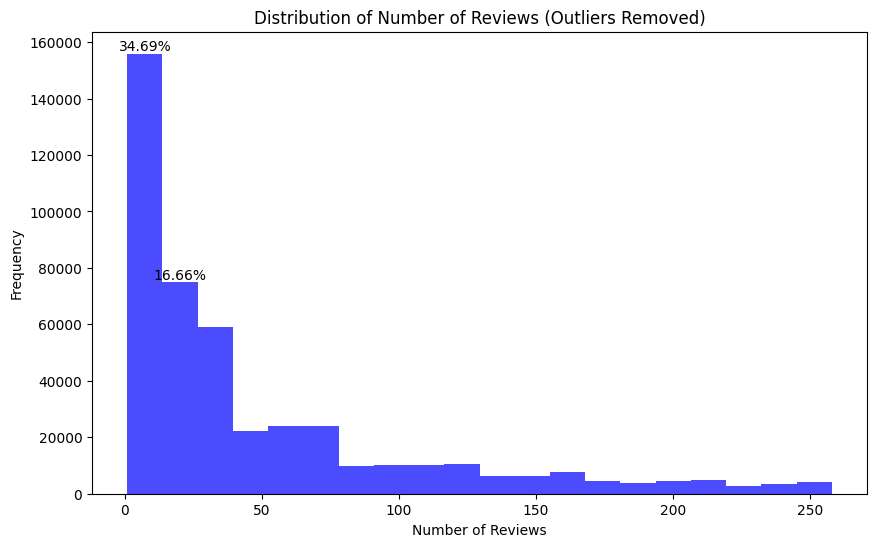

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculating the number of unique payment types per 'gmap_id' in payments_df
payments_df['num_of_payments'] = payments_df.groupby('gmap_id')['Payments'].transform('nunique')

# Merging payments_df with meta_df to include payment type counts
meta_df_merged = meta_df.merge(
    payments_df[['gmap_id', 'num_of_payments']].drop_duplicates(),
    on='gmap_id',
    how='left'
)

# Calculating the first and third quartiles, and the interquartile range of the number of reviews
q1 = meta_df_merged['num_of_reviews'].quantile(0.25)
q3 = meta_df_merged['num_of_reviews'].quantile(0.75)
iqr = q3 - q1

# Defining limits for outliers using IQR
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtering out outliers in the number of reviews
filtered_meta_df = meta_df_merged[
    (meta_df_merged['num_of_reviews'] >= lower_bound) &
    (meta_df_merged['num_of_reviews'] <= upper_bound)
]

# Plotting a histogram of the number of reviews after removing outliers
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    filtered_meta_df['num_of_reviews'],
    bins=20,
    color='blue',
    alpha=0.7
)

# Calculate percentages for each bin
bin_centers = 0.5 * (bins[:-1] + bins[1:])
percentages = (n / n.sum()) * 100

# Identify the two bins with the highest frequencies
top_bins = percentages.argsort()[-2:][::-1]  # Get indices of top two bins

# Annotate the top two bins with their percentages
for i in top_bins:
    plt.text(
        bin_centers[i], n[i], f'{percentages[i]:.2f}%',
        horizontalalignment='center',
        verticalalignment='bottom'
    )

plt.title('Distribution of Number of Reviews (Outliers Removed)')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()


<div class="alert alert-block alert-info">

# Insight 1 : Number of business by unique payment type  <a class="anchor" name="insight1"></a>

</div>

The histogram shows the distribution of review counts across all type of places, this highlights key patterns in user engagement. The trend is that a significant majority of items have very few reviews. Specifically, the first bar in the histogram, which represents the lowest range of review counts, contains approximately 34.69% of the total entries. This suggests that many of these places either do not attract much attention from users or are relatively new and haven't had the chance to accumulate a large number of reviews yet.

Furthermore, as the number of reviews increases, the frequency of items with those review counts decreases sharply. This pattern is typical in user data where a few items may be very popular or controversial, attracting a lot of reviews, while most others receive few. Therefore, it might be beneficial for businesses or the places of interest to implement strategies that encourage more user reviews to enhance credibility and visibility in the market.


In [ ]:
# Perform a left join on 'gmap_id'
merged_df_meta_cat = pd.merge(meta_df[['gmap_id', 'avg_rating', 'num_of_reviews']], category_exp_df[['gmap_id', 'category']], on='gmap_id', how='left')
merged_df_meta_cat = merged_df_meta_cat.drop_duplicates()
# Display the first few rows of the resulting DataFrame to verify the correct columns and join
print(merged_df_meta_cat.head())



                                 gmap_id  avg_rating  num_of_reviews  \
0  0x80c2c98c0e3c16fd:0x29ec8a728764fdf9         4.5               6   
2  0x80c2c778e3b73d33:0xbdc58662a4a97d49         4.4              18   
4   0x80c2c89923b27a41:0x32041559418d447         3.3               6   
6  0x80c2c632f933b073:0xc31785961fe826a6         4.3               7   
8  0x80c2cf163db6bc89:0x219484e2edbcfa41         3.5               6   

            category  
0   Textile exporter  
2  Korean restaurant  
4       Fabric store  
6       Fabric store  
8       Fabric store  


In [ ]:
# Drop duplicates in category_exp_df based on 'gmap_id', keeping the first entry
category_exp_df_unique = category_exp_df.drop_duplicates(subset='gmap_id', keep='first')

# Perform a left join on 'gmap_id'
merged_df_meta_cat = pd.merge(meta_df[['gmap_id', 'avg_rating', 'num_of_reviews']],
                              category_exp_df_unique[['gmap_id', 'category']],
                              on='gmap_id',
                              how='left')

# Remove any duplicates that might have resulted from the merge
merged_df_meta_cat = merged_df_meta_cat.drop_duplicates()

# Reorder the columns to display 'Category', 'avg_rating', 'num_of_reviews'
merged_df_meta_cat = merged_df_meta_cat[['category', 'avg_rating', 'num_of_reviews']]

# Display the first few rows of the resulting DataFrame to verify the correct columns and join
print(merged_df_meta_cat.head())


            category  avg_rating  num_of_reviews
0   Textile exporter         4.5               6
1  Korean restaurant         4.4              18
2       Fabric store         3.3               6
3       Fabric store         4.3               7
4       Fabric store         3.5               6


<ipython-input-13-43d288e0d223>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(categories.cat.categories))


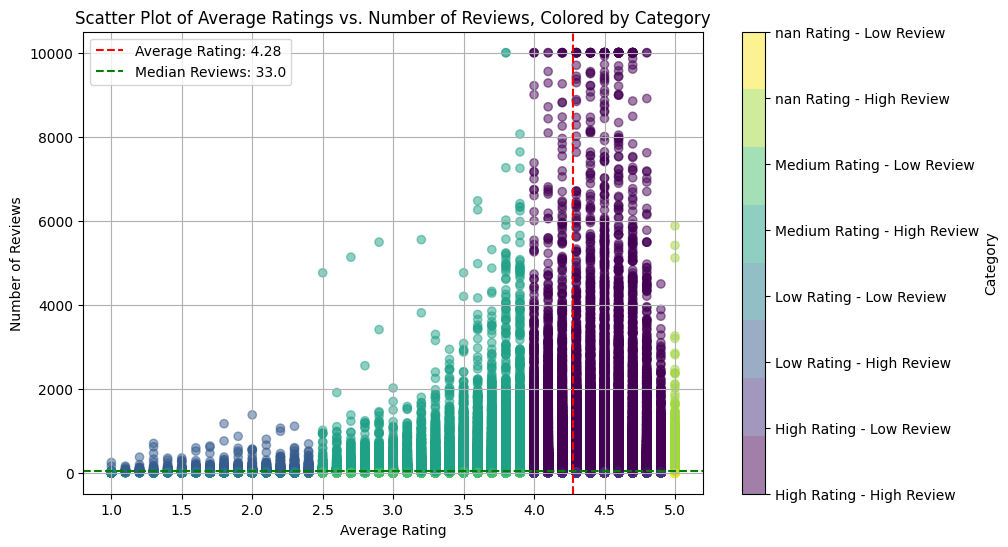

In [ ]:
# Define rating categories
merged_df_meta_cat['rating_category'] = pd.cut(merged_df_meta_cat['avg_rating'], bins=[0, 2.5, 4, 5], labels=['Low', 'Medium', 'High'], right=False)

# Define review categories based on percentiles
low_high_threshold = np.percentile(merged_df_meta_cat['num_of_reviews'], [50])  # Change 50 to your specific percentile needs for more granularity
merged_df_meta_cat['review_category'] = pd.cut(merged_df_meta_cat['num_of_reviews'], bins=[0, low_high_threshold[0], float('inf')], labels=['Low', 'High'], right=False)

# Combine the categories
merged_df_meta_cat['combined_category'] = merged_df_meta_cat['rating_category'].astype(str) + ' Rating - ' + merged_df_meta_cat['review_category'].astype(str) + ' Review'

# Create a color map based on unique values in 'combined_category'
categories = merged_df_meta_cat['combined_category'].astype('category')
colors = plt.cm.get_cmap('viridis', len(categories.cat.categories))

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_df_meta_cat['avg_rating'], merged_df_meta_cat['num_of_reviews'],
                      c=categories.cat.codes, cmap=colors, alpha=0.5)

# Calculate the median of 'num_of_reviews' and the average of 'avg_rating'
median_reviews = merged_df_meta_cat['num_of_reviews'].median()
average_rating = merged_df_meta_cat['avg_rating'].mean()

# Add vertical line for average of avg_rating
plt.axvline(x=average_rating, color='red', linestyle='--', label=f'Average Rating: {average_rating:.2f}')

# Add horizontal line for median of num_of_reviews
plt.axhline(y=median_reviews, color='green', linestyle='--', label=f'Median Reviews: {median_reviews}')

# Add labels and title
plt.xlabel('Average Rating')
plt.ylabel('Number of Reviews')
plt.title('Scatter Plot of Average Ratings vs. Number of Reviews, Colored by Category')

# Add a color bar with the category labels
cbar = plt.colorbar(scatter, ticks=np.arange(len(categories.cat.categories)))
cbar.set_label('Category')
cbar.set_ticklabels(categories.cat.categories)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


<div class="alert alert-block alert-info">

# Insight 2: Categorizing Customer Experiences  <a class="anchor" name="insight2"></a>

</div>



The scatter plot provides a comprehensive overview of how average ratings correlate with the number of reviews across different categories. By categorizing businesses based on their average ratings and review volumes, we can identify trends and outliers more effectively. For instance, businesses with high ratings but low review counts might indicate niche appeal or emerging popularity, whereas those with high ratings and high review counts signify well-established trust and satisfaction among a broader customer base.

Distinct color coding for each category allows for quick visualization of these trends. The plot highlights a concentration of businesses around the higher rating spectrum, suggesting a general tendency towards positive customer experiences in the dataset. The addition of median lines for reviews and average ratings helps pinpoint the typical performance metrics, providing a benchmark for comparing individual businesses or categories.

# Impact of Low Rating and Low Review

Businesses with low ratings and few reviews often struggle to build credibility and attract customers. A low rating suggests poor customer experiences, while a small number of reviews indicates limited engagement or visibility. This combination can create a negative cycle, making it difficult for the business to improve its reputation and grow.

# Impact of High Rating and Low Review

High ratings with few reviews can signal a positive but under-the-radar business. While the high rating reflects satisfied customers, the low review count may mean the business is new or not widely recognized. To fully benefit from their strong ratings, these businesses should focus on increasing visibility and encouraging more customer feedback.

# Impact of High Rating and High Review

Businesses with both high ratings and many reviews are generally seen as trustworthy and popular. This combination signals consistent quality and broad customer approval, which can attract more customers and reinforce the business's strong reputation. It creates a positive feedback loop that supports sustained success.

# Impact of Low Rating and High Review

A low rating with a high number of reviews indicates widespread dissatisfaction. While the business is visible and engages with many customers, the low rating suggests that it frequently fails to meet expectations. This scenario can severely damage a business’s reputation, as it highlights consistent issues that are recognized by a broad customer base.


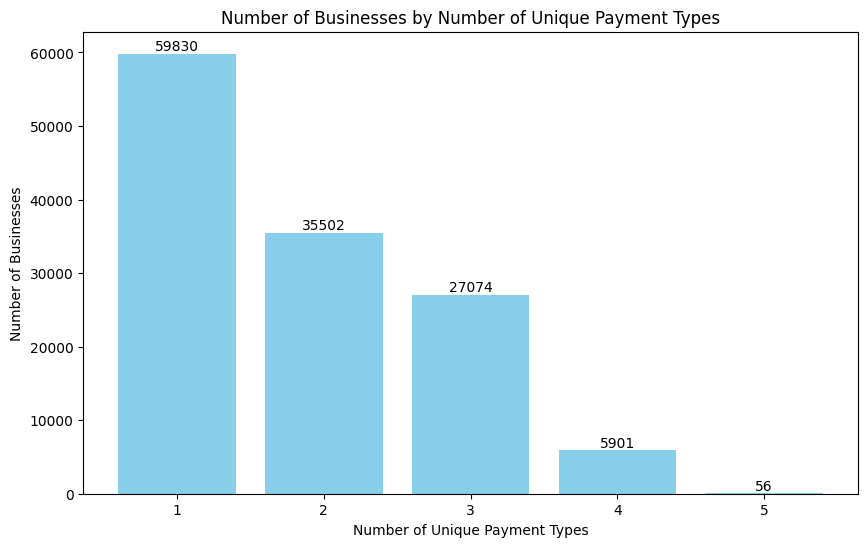

In [ ]:
# Calculate the number of unique payment types for each business
payments_df['num_of_payments'] = payments_df.groupby('gmap_id')['Payments'].transform('nunique')

# Count how many businesses have each number of unique payments
payment_counts = payments_df[['gmap_id', 'num_of_payments']].drop_duplicates()['num_of_payments'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(payment_counts.index, payment_counts.values, color='skyblue')

# Adding labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Number of Businesses by Number of Unique Payment Types')
plt.xlabel('Number of Unique Payment Types')
plt.ylabel('Number of Businesses')
plt.xticks(payment_counts.index)
plt.show()


<div class="alert alert-block alert-info">

# Insight 3.a: Unique of payment type  <a class="anchor" name="insight3a"></a>

</div>

The bar chart illustrates the distribution of businesses based on the number of unique payment types they accept, showing a clear trend towards simpler payment systems. A majority of businesses, precisely 59,830, only accept one type of payment, suggesting a preference for simplicity or possibly limitations in their ability to process multiple payment forms. As the number of payment types increases, there is a notable decrease in the number of businesses adopting them, with 35,502 businesses accepting two types, 27,074 accepting three types, and only 5,901 accepting four types. We also observe that only 56 businesses offer five different payment types.

This trend might indicate that most businesses aim to minimize complexity in transaction processes or that customers typically do not demand multiple payment options. The steep drop in numbers as the payment options increase suggests potential logistic cost or cost-related challenges associated with implementing numerous payment systems. This could be an area of interest for businesses looking to differentiate themselves in a competitive market by offering more diverse payment options, potentially enhancing customer convenience and satisfaction.


In [ ]:
# Create a new DataFrame to find combinations
combination_df = payments_df.groupby(['gmap_id', 'num_of_payments'])['Payments'].agg(lambda x: tuple(sorted(set(x)))).reset_index()

In [ ]:
# Calculate the number of unique payment types for each business
payments_df['num_of_payments'] = payments_df.groupby('gmap_id')['Payments'].transform('nunique')

# Create a new DataFrame to find combinations
combination_df = payments_df.groupby(['gmap_id', 'num_of_payments'])['Payments'].agg(lambda x: tuple(sorted(set(x)))).reset_index()

# Count occurrences of each combination
combination_df['combination_count'] = combination_df.groupby(['num_of_payments', 'Payments'])['gmap_id'].transform('count')

# Drop duplicates
combination_df = combination_df.drop_duplicates(subset=['num_of_payments', 'Payments'])

# Sort to find the most popular combinations
combination_df = combination_df.sort_values(by=['num_of_payments', 'combination_count'], ascending=[True, False])


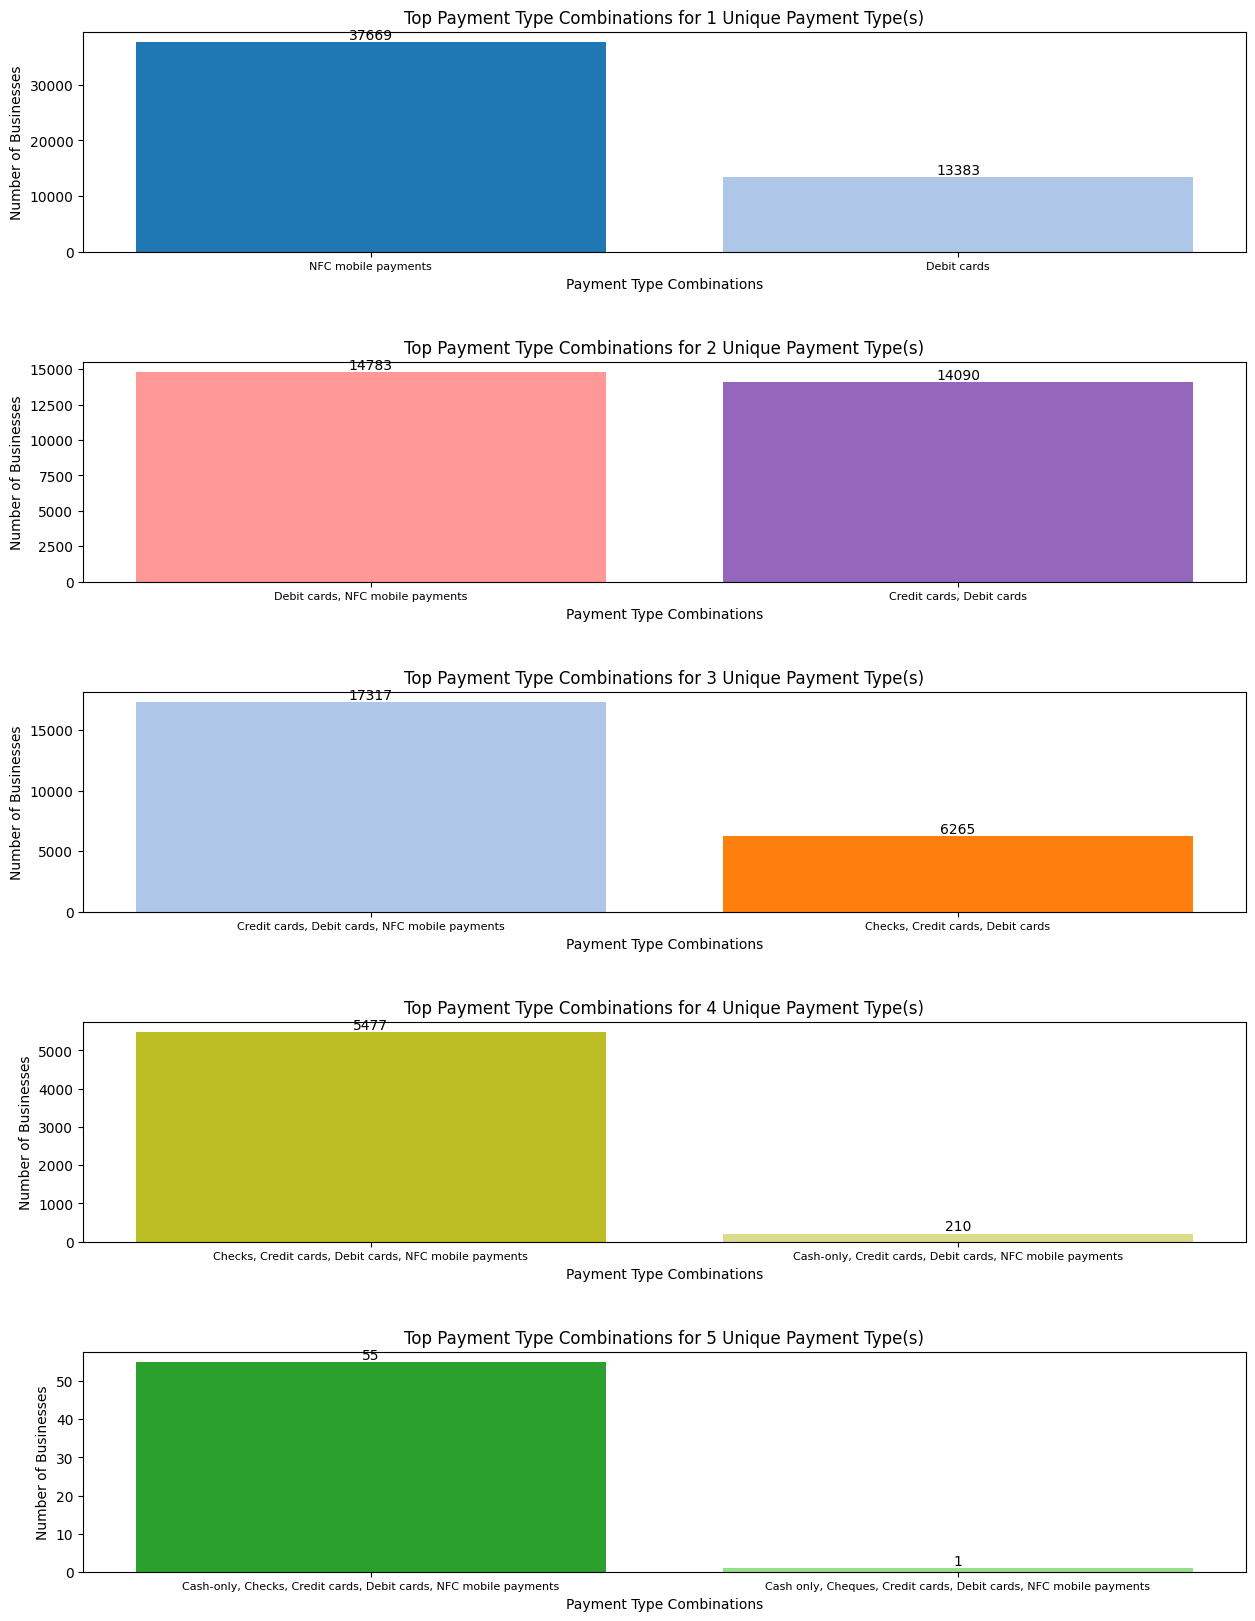

In [ ]:
# Prepare the data
# Remove unwanted characters and clean up the labels
combination_df['Payments'] = combination_df['Payments'].apply(lambda x: ', '.join(x).replace("'", "").replace("(", "").replace(")", ""))

# Generate a unique color for each unique payment type combination
unique_payments = combination_df['Payments'].unique()
color_map = {up: plt.cm.tab20(i % 20) for i, up in enumerate(unique_payments)}

# Plotting setup
fig, axs = plt.subplots(nrows=combination_df['num_of_payments'].nunique(), figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for idx, (name, group) in enumerate(combination_df.groupby('num_of_payments')):
    # Select the top 2 combinations for each unique payment type count
    top_combinations = group.head(2)  # Get top 2 combinations

    # Assign colors based on unique payment combinations
    colors = [color_map[payment] for payment in top_combinations['Payments']]

    # Create bar chart
    bars = axs[idx].bar(top_combinations['Payments'], top_combinations['combination_count'], color=colors)

    # Setting chart title and labels
    axs[idx].set_title(f'Top Payment Type Combinations for {name} Unique Payment Type(s)')
    axs[idx].set_xlabel('Payment Type Combinations')
    axs[idx].set_ylabel('Number of Businesses')

    # Setting x-axis labels to be horizontal
    axs[idx].tick_params(axis='x', rotation=0, labelsize=8)  # Smaller font size if needed

    # Adding text labels on top of each bar to show counts
    for bar in bars:
        yval = bar.get_height()
        axs[idx].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Show the plots
plt.show()


<div class="alert alert-block alert-info">

# Insight 3.b: Most popular combination payment type  <a class="anchor" name="insight3b"></a>

</div>






The bar chart displays the number of businesses adopting different combinations of payment types, segmented by the number of unique payment options they offer, ranging from one to five. The graph shows a dominant preference for simpler payment setups with a high concentration of businesses opting for single payment types, specifically NFC mobile payments, which stand out with 37,669 businesses using them exclusively. As we explore combinations for businesses that accept two payment types, the most popular combination is 'Debit cards, NFC mobile payments' used by 14,783 businesses, followed closely by 'Credit cards, Debit cards' with 14,090 businesses.

The trend of declining numbers as the complexity of payment options increases is evident. For three payment types, the combination 'Credit cards, Debit cards, NFC mobile payments' leads with 17,317 businesses. However, businesses offering four and five unique payment types are significantly fewer, illustrating a drop in adoption as the payment options become more diversified. Notably, only one business offers all five considered payment types, highlighting the rarity of such extensive payment options.


In [ ]:
rating_cat_by_id = pd.merge(meta_df[['gmap_id', 'avg_rating', 'num_of_reviews']], category_exp_df[['gmap_id', 'category']], on='gmap_id', how='left')
rating_cat_by_id

,gmap_id,avg_rating,num_of_reviews,category
0,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,4.5,6,Textile exporter
1,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,4.5,6,Textile exporter
2,0x80c2c778e3b73d33:0xbdc58662a4a97d49,4.4,18,Korean restaurant
3,0x80c2c778e3b73d33:0xbdc58662a4a97d49,4.4,18,Korean restaurant
4,0x80c2c89923b27a41:0x32041559418d447,3.3,6,Fabric store
...,...,...,...,...
1193379,0x80dcba7983a059af:0x2a006c069483d3d2,4.7,763,Park
1193380,0x80dcba7983a059af:0x2a006c069483d3d2,4.7,763,Tourist attraction
1193381,0x80dcb09e3af6228b:0xa55fc2f742364e02,4.8,96,State park
1193382,0x80dd31c81d5f153d:0x501886193d0102e7,4.3,17,Playground


<div class="alert alert-block alert-info">

# Insight 4a Top 5 Most Frequent Categories <a class="anchor" name="insight4a"></a>

</div>



               category  frequency
0            Restaurant      38645
1  Fast food restaurant      15592
2    Mexican restaurant      13997
3      Auto repair shop      13303
4          Beauty salon      10926


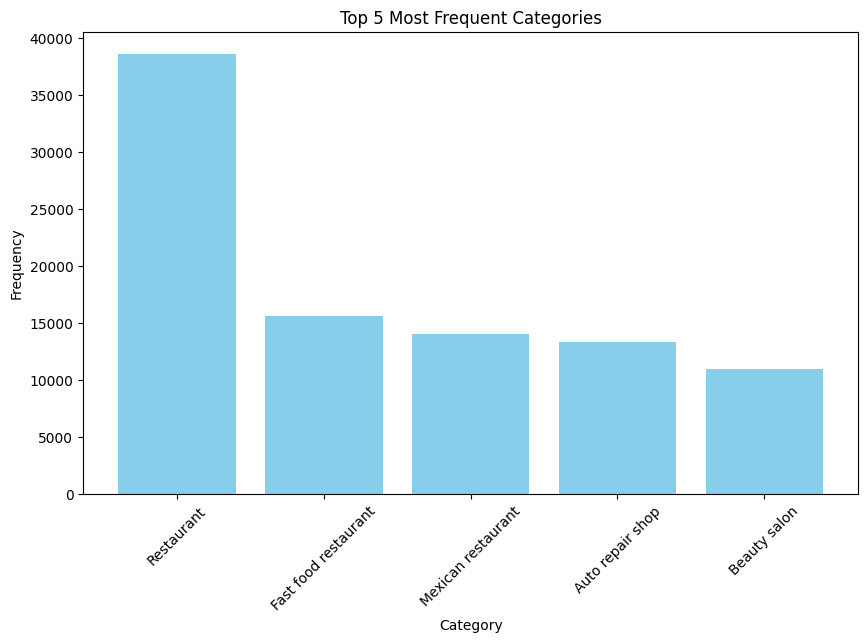

In [ ]:
category_frequency = rating_cat_by_id['category'].value_counts().reset_index()
category_frequency.columns = ['category', 'frequency']

print(category_frequency.head())

# Plotting top 5 categories
top_categories = category_frequency.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_categories['category'], top_categories['frequency'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Categories')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# List of categories to filter
categories_list = [
    'Restaurant',
    'Fast food restaurant',
    'Mexican restaurant',
    'Auto repair shop',
    'Beauty salon'
]

# Filtering the DataFrame
filtered_df_top5 = rating_cat_by_id[(rating_cat_by_id['num_of_reviews'] > 100) &
                               (rating_cat_by_id['category'].isin(categories_list))]

print(filtered_df_top5.head())


# Joining with the word counts DataFrame
joined_df = pd.merge(filtered_df_top5, df_gmap_word_counts, on='gmap_id', how='left')


                                     gmap_id  avg_rating  num_of_reviews  \
2848   0x80952f4d409f5e57:0x97449589ed6f4f44         5.0             355   
2849   0x80952f4d409f5e57:0x97449589ed6f4f44         5.0             355   
13806  0x80952f4d409f5e57:0x97449589ed6f4f44         5.0             355   
13807  0x80952f4d409f5e57:0x97449589ed6f4f44         5.0             355   
22275  0x80dc71c4cb9f9099:0x69d7e281ae53155f         4.4             147   

               category  
2848   Auto repair shop  
2849   Auto repair shop  
13806  Auto repair shop  
13807  Auto repair shop  
22275  Auto repair shop  


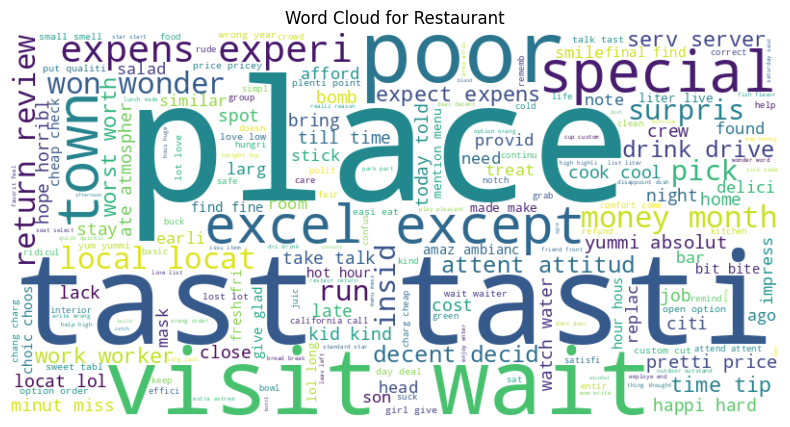

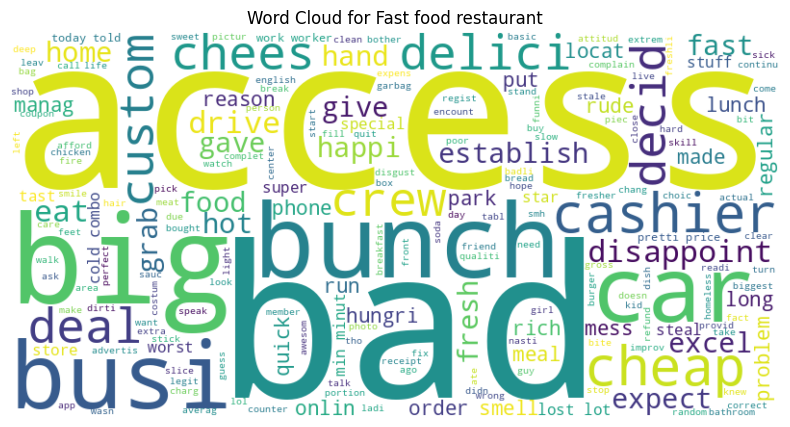

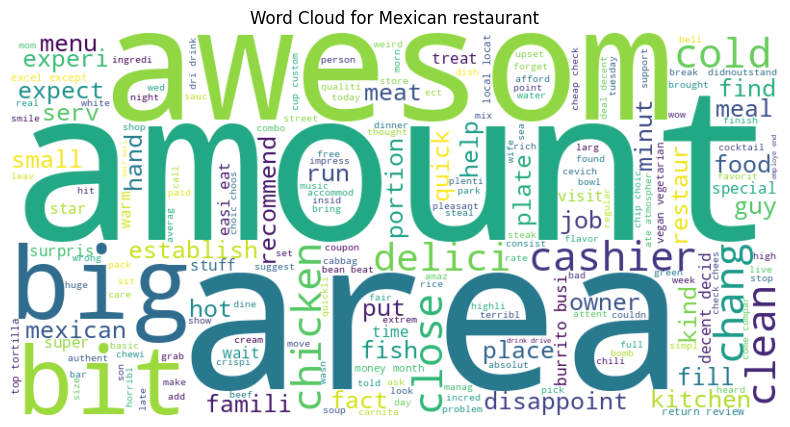

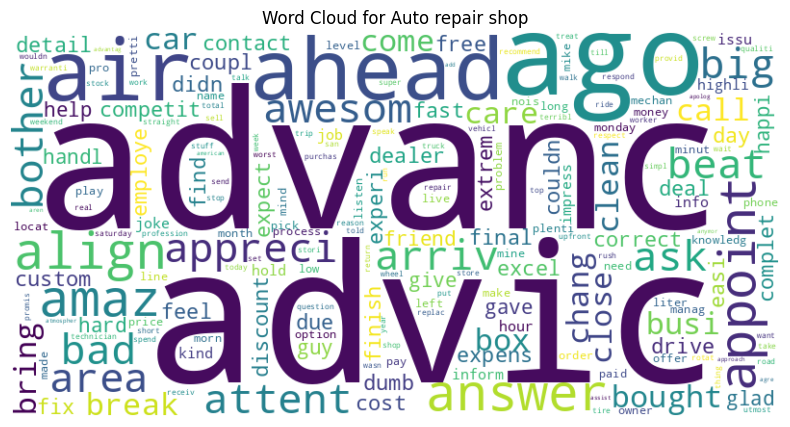

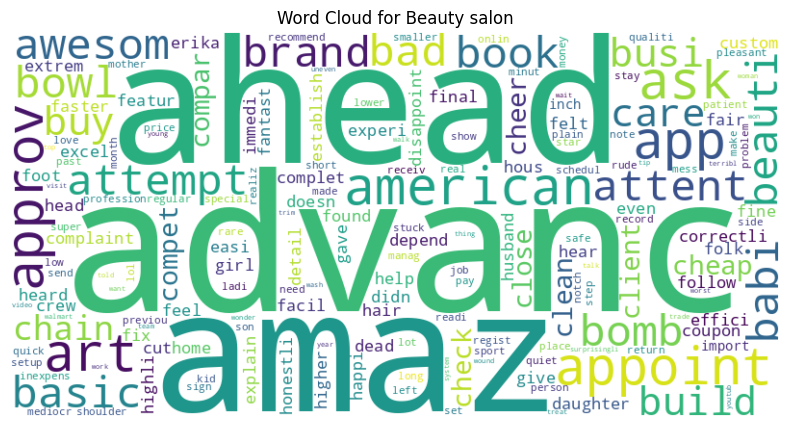

In [ ]:
# Function to generate word cloud
def generate_word_cloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each category
for category in categories_list:
    # Filter words by category
    category_words = joined_df[joined_df['category'] == category]['word'].dropna()
    if not category_words.empty:
        generate_word_cloud(category_words, f'Word Cloud for {category}')
    else:
        print(f"No data available for category: {category}")


<div class="alert alert-block alert-info">

# Insight 4b Customer Sentiments Across Key Business Categories <a class="anchor" name="insight4b"></a>

</div>



## Insight for Restaurants

The word cloud for "Restaurant" shows a range of customer feedback. Positive words like "excellent," "wonder," "love," and "fresh" show that many customers enjoy the food and service. These words stand out, highlighting the restaurants' strengths. However, words like "poor," "horrible," and "rude" point to some customer dissatisfaction. This range of feedback suggests varying experiences from highly satisfied to those with unfavorable issues. Words like "wait," "expensive," and "cost" suggest that high prices and long waits could be improved to meet customer expectations better.

## Insight for Fast Food Restaurants

The word cloud for "Fast Food Restaurant" shows diverse customer experiences, focusing on service and food quality. Words like "busy," "quick," and "grab" reflect the fast service expected at these places. However, words like "problem," "disappoint," and "cheap" show some negative views, possibly about food quality or service. Positive words like "delicious," "fresh," and "happy" suggest that many are happy with the food. The feedback points to strengths in fast service and areas for improvement in food quality and customer experience.

## Insight for Mexican Restaurants

The word cloud for "Mexican Restaurant" brightly shows a mix of feelings and food highlights. Words like "delicious," "chicken," "taco," and "burrito" emphasize popular dishes that customers love, showing a strong liking for the flavors offered. Words like "warm," "fresh," and "authentic" enhance the positive dining experiences. However, words like "disappoint," "cold," and "average" suggest areas needing improvement, especially in food temperature and service. Words like "family" and "friendly" also underline the inviting and community atmosphere of these places.

## Insight for Auto Repair Shops

The word cloud for "Auto Repair Shop" displays various customer experiences, focusing heavily on service quality and interactions. Words like "go ahead," "appreciate," and "awesome" suggest many customers are happy with the service. Words like "care," "help," and "answer" show good communication between staff and customers. However, words like "problem," "complaint," and "issue" reveal some dissatisfaction with service times, costs, or the quality of repairs. This feedback underlines the need for consistent, high-quality customer service.

## Insight for Beauty Salons

The word cloud for "Beauty Salon" shows varied experiences centered around customer service and satisfaction. Phrases like "appointment," "approve," and "care" highlight the importance of being organized and providing personal attention. Words like "awesome," "fantastic," and "beautiful" suggest that many clients are pleased with their service results. However, words like "complaint," "wait," and "rude" show areas needing improvement, particularly in customer interactions and service speed. The overall feedback is positive but points out some areas for better customer experiences.


In [ ]:

# Join the dataframes on 'gmap_id' with a more unique variable name
unique_merged_df = pd.merge(rating_cat_by_id, df_gmap_word_counts, on='gmap_id', how='inner')

# Define specific categories of interest with a unique variable name
unique_categories_list = [
    'Restaurant',
    'Fast food restaurant',
    'Mexican restaurant',
    'Auto repair shop',
    'Beauty salon'
]

# Filter merged DataFrame for specified categories
unique_filtered_df = unique_merged_df[unique_merged_df['category'].isin(unique_categories_list)]

# Aggregate the word counts for each category and word
unique_aggregated_data = unique_filtered_df.groupby(['category', 'word'])['word_count'].sum().reset_index()

# Find the top 5 words by word count for each category
unique_top_words_per_category = unique_aggregated_data.groupby('category').apply(
    lambda x: x.nlargest(5, 'word_count')
).reset_index(drop=True)


In [ ]:
# Join the dataframes on 'gmap_id' with a more unique variable name
unique_merged_df = pd.merge(rating_cat_by_id, df_gmap_word_counts, on='gmap_id', how='inner')

# Unique Categories List
unique_categories_list = [
    'Restaurant',
    'Fast food restaurant',
    'Mexican restaurant',
    'Auto repair shop',
    'Beauty salon'
]

import plotly.express as px

# Create a treemap
fig = px.treemap(unique_top_words_per_category, path=['category', 'word'], values='word_count',
                 color='category', color_discrete_map={'Auto repair shop':'lightblue', 'Beauty salon':'pink'},
                 title='Word Counts by Category',
                 width=1200, height=1000,
                 custom_data=['word', 'word_count'])


fig.data[0].texttemplate = "%{label}<br>%{customdata[1]}"

fig.show()



<div class="alert alert-block alert-info">

# Insight 5: Comparative Insights on Popular Business Categories and Their Key Terms <a class="anchor" name="insight5"></a>

</div>

- **Trends Across Categories**: Each of the top five business categories—Mexican restaurants, general restaurants, auto repair shops, fast food establishments, and beauty salons—show distinct trends in the words frequently mentioned in reviews. This highlights the unique focal points of customer feedback in each sector.

- **Mexican Restaurant**: Dominated by menu-specific items like "taco" and "food," indicating a strong association with traditional Mexican cuisine in customer reviews.

- **General Restaurant**: Features a broader range of terms including "food," "order," "beer," and "drink," reflecting the diverse dining experiences and offerings that draw attention in reviews.

- **Auto Repair Shop**: Technical aspects such as "tire," "part," and "custom" are emphasized, suggesting that discussions often revolve around specific services and customization, central to customer experiences at these locations.

- **Fast Food Restaurant**: Highlighted by terms associated with the fast service model such as "food," "order," and "fast," underscoring the fast-paced nature of these eateries and the efficiency valued by customers.

- **Beauty Salon**: Focuses on personal care services with words like "hair" and "cut" being most prominent, pointing to the primary services that engage clients.

This visualization not only shows which terms are most spoken about in each category but also provides insight into the operational focus and customer priorities within each type of business. These patterns can assist business owners in understanding what drives customer discussions and can inform targeted improvements and marketing strategies.


<div class="alert alert-block alert-warning">

## 6.  Data Analysis <a class="anchor" name="summary"></a>

 </div>

Based on the analysis above, we investigate questions on:
........
Our findings are:
.......

These findings tell us:
.......



<div class="alert alert-block alert-warning">

## 7. References <a class="anchor" name="Ref"></a>

</div>